In [1]:
# imports for exploratory dataframe manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imports for exploratory data analysis
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
import os
import cv2
from sklearn.model_selection import train_test_split

In [3]:
def get_img_paths(base_dir, ignore_filetypes=['.txt', '.cpp', '.gif']):
    """
    Inputs:
        base_dir (string/ os.path type) relative path to the directory with folders containing images
        *kwargs
        ignore_filetypes (list of strings) filetypes to exclude from output
        type_foldes (dictionary) folders that identify different filetypes and add identifiers to add to output
    Returns:
        paths (list of tuples) relative paths to files with identifiers
    """
    absent_paths = []
    present_paths = []

    for root, dirs, files in os.walk(base_dir):
        #not removing undesired files
#         # remove undesired files
#         for file in files:
#             for file_type in ignore_filetypes:
#                 if file_type == file[-4:]:
#                     files.remove(file)
                    
        if files:
        
            for file in files:
                full_path = os.path.join(root, file)
                
                if 'NO' in full_path:
                    absent_paths.append((full_path, 0))

                elif 'YES' in full_path:
                    present_paths.append((full_path, 1))

    #         if type_folders:
    #             for key, value in type_folders.items():
    #                 if key in root:

    #         print('root: ', root)
    #         print('files: ', files[:5], len(files))
    #         print('paths: ', paths)
#     absent_paths.extend(present_paths)
    return absent_paths, present_paths

In [4]:
basedir = "D:\MRI_data\Kaggle" 
absent, present = get_img_paths(basedir)

In [5]:
len(absent + present)

3530

In [6]:
len(present)

2919

In [7]:
def get_data(input_data, img_size=150):
    """
    This function takes an image type and classification with matching index and returns  image data with classification

    Input:
        x (list of path like entries) paths leading to image data to be loaded
        y (list of classification) list of classifications matching index of x data

    Returns:
        data (np.array) image data with classification
    """

    data = []

    for i in range(len(input_data)):
        path = input_data[i][0]
        class_num = input_data[i][1]

        #         for img in os.listdir(path):

        try:
            img_arr = cv2.imread(path)
            resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
            data.append([resized_arr, class_num, path])

        except Exception as e:
            print(f'{e} on path {path}')

    return np.array(data)

In [8]:
# # using method from https://www.pyimagesearch.com/2020/04/20/detect-and-remove-duplicate-images-from-a-dataset-for-deep-learning/
# import imutils
# from imutils import paths

In [9]:
# # create function to alter image and make comparison less cpu intensive
# def get_hash(image, hash_size=32):
#     '''
#     Converts image to grayscale and resizes image.
#     '''
#     # check if image has classification entry, if so take only img data
       
#     image = image
# #     image_class = image[1]
# #     image_path = image_class[2]
    
        
#     # convert to grayscale
#     gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
#     # resize to add column to create hash
#     resized_image = cv2.resize(image, (hash_size+1, hash_size))
    
#     # compute horizontal gradient between column pixels
#     diff = resized_image[:, 1:] > resized_image[:, :-1]
    
#     # convert difference of image to hash
#     image_hash = sum([2**i for (i, v) in enumerate(diff.flatten()) if v])
    
#     return image_hash #, image_class, image_path

In [10]:
# def custom_get_data(input_paths, img_size=150, return_path=True, remove_duplicates=True, hash_size=8):
#     """
#     This function takes an image type and classification with matching index and returns  image data with classification

#     Input:
#         x (list of path like entries) paths leading to image data to be loaded
#         y (list of classification) list of classifications matching index of x data

#     Returns:
#         data (np.array) image data with classification
#     """

#     data = []
#     hashes = []
#     unique_images = []
#     duplicate_paths = []

#     for i in range(len(input_paths)):
#         path = input_paths[i][0]
#         class_num = input_paths[i][1]

#         if remove_duplicates:
            

#         try:
#             img_arr = cv2.imread(path)
#             resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
#             data.append([resized_arr, class_num, path])

#         except Exception as e:
#             print(e)

#     return np.array(data)

In [11]:
# def get_data(input_data, img_size=150, hash_size=150):
#     """
#     This function takes an image type and classification with matching index and returns  image data with classification

#     Input:
#         x (list of path like entries) paths leading to image data to be loaded
#         y (list of classification) list of classifications matching index of x data

#     Returns:
#         data (np.array) image data with classification
#     """

#     data = []
#     hashes = []
#     unique_paths = []
#     duplicate_paths = []
    
#     # indexer for identifying duplicate image
#     k = 0
    
#     for i in range(len(input_data)):
#         path = input_data[i][0]
#         class_num = input_data[i][1]

#         #         for img in os.listdir(path):

#         try:
#             # load image from path
#             img_arr = cv2.imread(path)
            
#             # hash image
#             img_hash = get_hash(img_arr, hash_size=hash_size)
    
#             if img_hash not in hashes:
#                 hashes.append(img_hash)
#                 unique_paths.append(path)
                
#             else:
#                 repeat_index = hashes.index(img_hash)+k
#                 duplicate_paths.append((input_data[repeat_index][0], path))
#                 k +=1
#                 continue
            
#             resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
#             data.append([resized_arr, class_num])

#         except Exception as e:
#             print(e)

#     return np.array(data), duplicate_paths

In [12]:
tumor_data = get_data(present)
len(tumor_data)

2919

In [13]:
import time

In [14]:
start = time.time()
(tumor_data[0][0] == tumor_data[0][0]).all()
(tumor_data[2][0] == tumor_data[1][0]).all()
stop = time.time()

stop-start

0.0009877681732177734

## Use pillow to compare images

In [15]:
# # from https://stackoverflow.com/questions/35176639/compare-images-python-pil/56280735
# # import pillow to compare images
# from PIL import Image
# from PIL import ImageChops

In [16]:
# start = time.time()

# img1 = Image.open(present[0][0])
# img2 = Image.open(present[2][0])
# # img3 = Image.open(present1)
# diff = ImageChops.difference(img1, img2)


# stop = time.time()
# stop-start

## Train Test Split Data

In [17]:
# define train size for data set
# split before combining datasets
train_size = 0.8 # eighty percent
test_size = 0.15 # fifteen percent
val_size = 0.05 # five percent

# calculate test size for second split
test_size2 = test_size/(1-train_size)

# split absent paths into train and test
absent_train, absent_test = train_test_split(absent, train_size=train_size, random_state=2021)

# split absent test paths into test and validation
absent_test, absent_val = train_test_split(absent_test, train_size=test_size2, random_state=2021)

# split present paths into train and test
present_train, present_test = train_test_split(present, train_size=train_size, random_state=2021)

# split present paths into test and val
present_test, present_val = train_test_split(present_test, train_size=test_size2, random_state=2021)

In [18]:
print(f'''
Tumor Training Data: {len(present_train)}\n
Tumor Testing Data: {len(present_test)}\n
Tumor Validation Data: {len(present_val)}\n
Absent Training Data: {len(absent_train)}\n
Absent Testing Data: {len(absent_test)}\n
Absent Validation Data: {len(absent_val)}
''')


Tumor Training Data: 2335

Tumor Testing Data: 438

Tumor Validation Data: 146

Absent Training Data: 488

Absent Testing Data: 92

Absent Validation Data: 31



In [19]:
# combnine train and test and val (respectively)
train = absent_train
train.extend(present_train)

test = absent_test
test.extend(present_test)

val = absent_val
val.extend(present_val)

# load data 

In [20]:
train_img_data = get_data(train)
train_img_len = len(train_img_data)

val_img_data = get_data(val)
val_img_len = len(val_img_data)

test_img_data = get_data(test)
test_img_len = len(test_img_data)

print(f"\nTrain images: {train_img_len}\nValidation images: {val_img_len}\nTest images: {test_img_len}")

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 on path D:\MRI_data\Kaggle\classification_images\Training\NO\no_tumor\frontal_section\notebooks\T1_MRI.gif
OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 on path D:\MRI_data\Kaggle\classification_images\Training\NO\no_tumor\frontal_section\notebooks\T2_MRI.gif
OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 on path D:\MRI_data\Kaggle\classification_images\Training\NO\no_tumor\frontal_section\notebooks\.ipynb_checkpoints\T1_MRI-checkpoint.gif
OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 on pa

In [21]:
len(train)

2823

In [22]:
train[0]

('D:\\MRI_data\\Kaggle\\classification_images\\Testing\\NO\\no_tumor\\horizontal_section\\image(24).jpg',
 0)

In [23]:
train_img_data[0][2]

'D:\\MRI_data\\Kaggle\\classification_images\\Testing\\NO\\no_tumor\\horizontal_section\\image(24).jpg'

## Remove Duplicate Images

In [24]:
def remove_duplicates(data):
    '''
    function takes a list of entries and returns a list of all unique entries
    '''

    unique_list = []
    duplicate_list = []
    # loop through original images
    for image in data:
        img = image[0]
        
        is_unique = True
        
        # loop through new list
        for unique_image in unique_list:
            unique_img = unique_image[0]
            
            # check existing entries to new entry
            if (img == unique_img).all():
                is_unique = False
                print(f'duplicate found:{img[0][25:26]} and {unique_img[0][25:26]}')
                break
                
        # add to unique list if unique
        if is_unique:
            unique_list.append(image)
#             print('appended')
        
        else:
            duplicate_list.append(image)
            
    return np.array(unique_list), np.array(duplicate_list)

In [25]:
img1 = val_img_data[0]
img2 = val_img_data[1]
img3 = val_img_data[0]

In [26]:
(img1[0] == img3[0]).all()

True

In [27]:
unique_train_img, train_duplicate = remove_duplicates(train_img_data)
unique_val_img, val_duplicate = remove_duplicates(val_img_data)
unique_test_img, test_duplicate = remove_duplicates(test_img_data)

duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[14 14 14]] and [[14 14 14]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[30 30 30]] and [[30 30 30]]
duplicate found:[[14 14 14]] and [[14 14 14]]
duplicate found:[[20 20 20]] and [[20 20 20]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[3 3 3]] and [[3 3 3]]
duplicate found:[[4 4 4]] and [[4 4 4]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[30 30 30]] and [[30 30 30]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[3 3 3]] and [[3 3 3]]
duplicate found:[[1 1 1]] and [[1 1 1]]
duplicate found:[[15 15 15]] and [[15 15 15]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
dupl

In [28]:
len(unique_train_img)

2533

In [29]:
len(train_img_data)

2810

In [30]:
len(unique_val_img)

175

In [31]:
len(val_img_data)

176

In [32]:
len(unique_test_img)

514

In [33]:
len(test_img_data)

530

In [34]:
len(val)

177

In [35]:
labels = ['Tumor Absent', 'Tumor Present']

In [36]:
unique_train_img[0]

array([array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
       0,
       'D:\\MRI_data\\Kaggle\\classification_images\\Testing\\NO\\no_tumor\\horizontal_section\\image(24).jpg'],
      dtype=object)

(-0.5, 149.5, 149.5, -0.5)

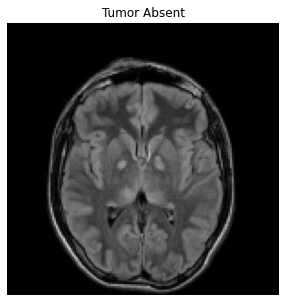

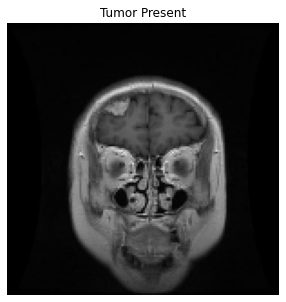

In [37]:
# plot image data from first [1] train image data (tumor-free brain)
plt.figure(figsize=(5,5))
plt.imshow(unique_train_img[0][0], cmap='gray')
plt.title(labels[unique_train_img[0][1]])
plt.axis('off')

# plot image data from last [-1] train image data (tumor patient brain)
plt.figure(figsize=(5,5))
plt.imshow(unique_train_img[-1][0], cmap='gray')
plt.title(labels[train_img_data[-1][1]])
plt.axis('off')

In [38]:
# separate image data and identifiers
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for data, label, _ in unique_train_img:
    x_train.append(data)
    y_train.append(label)
    
for data, label, _ in unique_val_img:
    x_val.append(data)
    y_val.append(label)
    
for data, label, _ in unique_test_img:
    x_test.append(data)
    y_test.append(label)

In [39]:
# scale data and convert to np.array for efficiency

x_train = np.array(x_train)/255

x_test = np.array(x_test)/255

x_val = np.array(x_val)/255

In [40]:
img_size = 150
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 3)

x_test = x_test.reshape(-1, img_size, img_size, 3)

x_val = x_val.reshape(-1, img_size, img_size, 3)

# DATAGEN

Alter data to make model more robust

In [41]:
from keras.preprocessing.image import ImageDataGenerator

In [42]:
datagen = ImageDataGenerator(\
                            featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False, 
                            zca_whitening=False, 
                            rotation_range=30,
                            zoom_range=0.25,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=False)

# FSM

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [44]:
fsm = Sequential()
fsm.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,3)))
fsm.add(Flatten())
fsm.add(Dense(units=1, activation='sigmoid'))
fsm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision'])
fsm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 720001    
Total params: 720,897
Trainable params: 720,897
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.callbacks import ReduceLROnPlateau

In [46]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.3, min_lr=10**-9)

# Run Model

In [47]:
epochs = 12
history = fsm.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction])

Epoch 1/12
80/80 [==============================] - 20s 249ms/step - loss: 0.5674 - precision: 0.8626 - val_loss: 0.4664 - val_precision: 0.8333
Epoch 2/12
80/80 [==============================] - 20s 248ms/step - loss: 0.3597 - precision: 0.8726 - val_loss: 0.4425 - val_precision: 0.8679
Epoch 3/12
80/80 [==============================] - 20s 252ms/step - loss: 0.3465 - precision: 0.8818 - val_loss: 0.4483 - val_precision: 0.8485
Epoch 4/12
80/80 [==============================] - 20s 254ms/step - loss: 0.3318 - precision: 0.8898 - val_loss: 0.3763 - val_precision: 0.8580
Epoch 5/12
80/80 [==============================] - 20s 256ms/step - loss: 0.3235 - precision: 0.8849 - val_loss: 0.3675 - val_precision: 0.8614
Epoch 6/12
80/80 [==============================] - 20s 255ms/step - loss: 0.3281 - precision: 0.8900 - val_loss: 0.3876 - val_precision: 0.8554
Epoch 7/12
80/80 [==============================] - ETA: 0s - loss: 0.3101 - precision: 0.8911
Epoch 00007: ReduceLROnPlateau redu

In [48]:
y_test = np.array(y_test, dtype=np.uint8)

In [49]:
fsm.evaluate(x_test, y_test)

17/17 [==============================] - 1s 49ms/step - loss: 0.3672 - precision: 0.8697


[0.3672395348548889, 0.8697478771209717]

In [51]:
# model.predict_classes(x_test)
(fsm.predict(x_test) > 0.5).astype('int32')[:10]

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [52]:
len(y_test)

514

In [53]:
len(y_val)

175

## visualize performance

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
import seaborn as sns

No handles with labels found to put in legend.


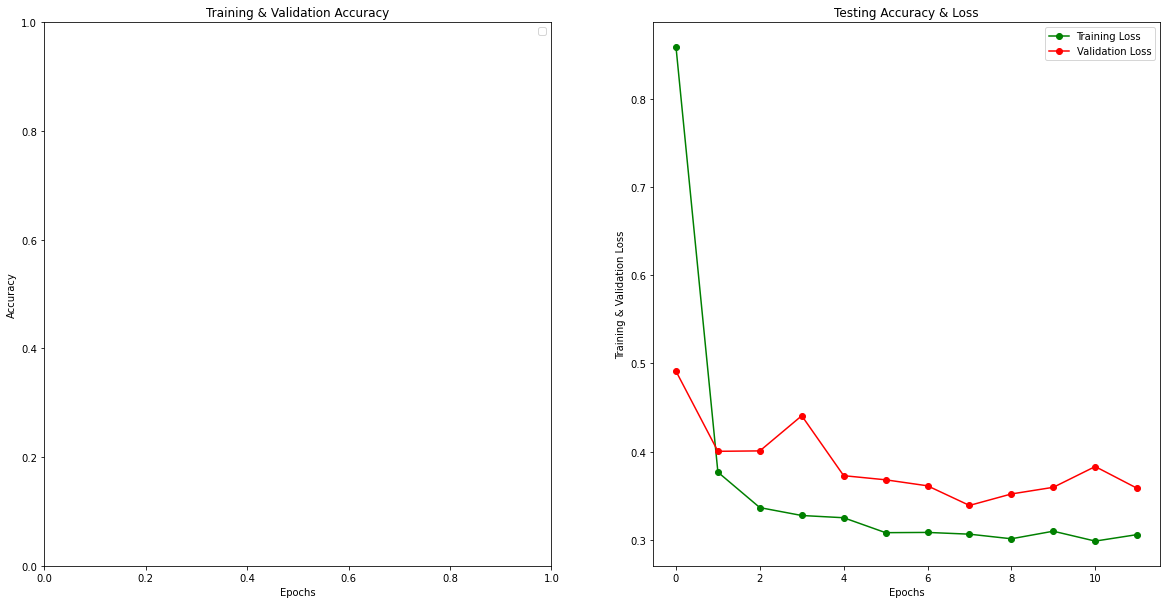

In [56]:

epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
# train_acc = history.history['accuracy']
train_loss = history.history['loss']
# val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

# ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
# ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [57]:
# define funciton to plot confusion matrix
def plot_confusion_matrix(model, X, Y, labels=['No Tumor', 'Tumor'],\
                          target_names=['No Tumor (Class 0)','Tumor Present (Class 1)'], filename='FSM'):
    '''
    This funciton takes the model (model), test data (X_test), and test classifications (Y_test) 
        and creates predictions from the existing model used to plot the confusion matrix.
        
    Parameters: 
        model (keras model): trained model used to make predictions of data
        X (np.array): image data used to make model predictions
        Y (np.array of ints): image classifications/ target used to determine accuracy of predictions
        *kwargs
    '''
    
    # get predictions
    predictions = (model.predict(X) > 0.5).astype('int32')
    print(classification_report(Y, predictions, target_names=target_names))
    
    #create confusion matrix
    cm = confusion_matrix(Y, predictions)
    print(cm)
    
    cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
    
    # plot confusion matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, cmap='Blues', linecolor='b', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)
    plt.savefig(f'../report/figures/{filename}_confusion_matrix', dpi=150, transparent = )

SyntaxError: invalid syntax (<ipython-input-57-fb104364e442>, line 28)

In [ ]:
plot_confusion_matrix(model, x_test, y_test)

# It's TIME for LIME

## implement LIME (and other techniques) to interpret model performance

# Get paths to image files 
## (updated)

In [ ]:
# imports from kaggle example https://www.kaggle.com/kmader/show-3d-nifti-images
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import skimage
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
from glob import glob
from skimage.io import imread

# Create .gif from fdata

## Define Functions

### Define function to create list of folder names within a given directory

In [ ]:
def get_dir_folders(directory):
    '''
    Input: list-like directory containing the folder names / file names within a given parent folder
    Returns: list clean_directory containing only folder names within the parent folder
    '''
    # create list copy of directory
    clean_directory = list(directory)
    
    # iterate through directory
    for name in directory:
        
        # remove all names with file extensions
        print('path: ', name)
        
        filename = name.split('/')[-1]
        
        if '.' in filename:
            print(f'remove {name} from list')
            directory.remove(name)
            
    return clean_directory
            
#         # remove all names with file extensions
#         print('path: ', name)
#         print('name[-4]', name[-4])
#         if '.' == name[-4]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif '.' in name[-6:]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'txt' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'tar' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            


### Define function to load image file(s) given folder path

In [ ]:
def get_img_paths(parent_folder, in_name='*'):
    
    return glob(os.path.join([folder for folder in image_folder if in_name in folder][0], '*'))


### Define function to create .gif given image data

In [26]:
# define function to create gif from image data
def create_gif(input_image, title='Scan .gif', filename='scan.gif'):
    # create .gif-like https://matplotlib.org/gallery/animation/dynamic_image2.html
    import imageio
    import matplotlib.animation as animate

    images = []
    input_image_data = input_image.get_fdata()

    fig = plt.figure()

    for i in range(len(input_image_data)):
        im = plt.imshow(input_image_data[i], animated=True)
        images.append([im])

    ani = animate.ArtistAnimation(fig, images, interval=25, blit=True, repeat_delay=500)

    plt.title(title, fontsize=20)
    ani.save(filename)
    plt.show()

## Load Brain Development Data Paths (Healthy Brains)

In [27]:
# get paths to data
# base path for data sourced from brain-development.org
bd_base_path = os.path.join('D:\MRI_data\BrainDevelopmentOrg')

# # base path for data sourced from Kaggle.com
# k_base_path = os.path.join('../data/MRI_data/Kaggle')

# # kaggle simple data path
# simple_yn_k_path = os.path.join(k_base_path, 'simple_yes_no')

# # kaggle advanced classification path\
# adv_class_k_path = os.path.join(k_base_path, 'classification_images')

In [28]:
bd_directory = glob(os.path.join(bd_base_path, '*'))
# bd_directory.append('.txt')

In [29]:
bd_directory

['D:\\MRI_data\\BrainDevelopmentOrg\\Demographics',
 'D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-MRA.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-PD.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T1.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T2.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\REAME_BrainDev.txt',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images']

In [30]:
# get list of all folders in directory
# get copy of full directory
bd_image_folders = get_dir_folders(bd_directory)
bd_image_folders

path:  D:\MRI_data\BrainDevelopmentOrg\Demographics
path:  D:\MRI_data\BrainDevelopmentOrg\DTI_images
path:  D:\MRI_data\BrainDevelopmentOrg\IXI-MRA.tar
remove D:\MRI_data\BrainDevelopmentOrg\IXI-MRA.tar from list
path:  D:\MRI_data\BrainDevelopmentOrg\IXI-T1.tar
remove D:\MRI_data\BrainDevelopmentOrg\IXI-T1.tar from list
path:  D:\MRI_data\BrainDevelopmentOrg\MRA_images
path:  D:\MRI_data\BrainDevelopmentOrg\PD_images
path:  D:\MRI_data\BrainDevelopmentOrg\REAME_BrainDev.txt
remove D:\MRI_data\BrainDevelopmentOrg\REAME_BrainDev.txt from list
path:  D:\MRI_data\BrainDevelopmentOrg\T2_images


['D:\\MRI_data\\BrainDevelopmentOrg\\Demographics',
 'D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-MRA.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-PD.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T1.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T2.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\REAME_BrainDev.txt',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images']

In [18]:
bd_image_folders = [folder for folder in bd_image_folders if 'image' in folder]

In [19]:
bd_image_folders

['D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images']

## Get Paths to Various Scan Types

### Get T1 Path

In [20]:
bd_image_files_T1 = glob(os.path.join([folder for folder in bd_image_folders if 'T1_' in folder][0], '*'))
print(len(bd_image_files_T1))
bd_image_files_T1[:5]

581


['D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI002-Guys-0828-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI012-HH-1211-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI013-HH-1212-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI014-HH-1236-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI015-HH-1258-T1.nii.gz']

### Get T2 Path

In [21]:
bd_image_files_T2 = glob(os.path.join(str([folder for folder in bd_image_folders if 'T2_' in folder][0]), '*'))
print(len(bd_image_files_T2))
bd_image_files_T2[:5]

578


['D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI002-Guys-0828-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI012-HH-1211-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI013-HH-1212-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI014-HH-1236-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI015-HH-1258-T2.nii.gz']

### Get MRA Path

In [22]:
bd_image_files_MRA = glob(os.path.join(str([folder for folder in bd_image_folders if 'MRA_' in folder][0]), '*'))
print(len(bd_image_files_MRA))
bd_image_files_MRA[:5]

570


['D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI002-Guys-0828-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI012-HH-1211-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI013-HH-1212-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI015-HH-1258-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI016-Guys-0697-MRA.nii.gz']

### Get PD Path

In [23]:
bd_image_files_PD = glob(os.path.join(str([folder for folder in bd_image_folders if 'PD_' in folder][0]), '*'))
print(len(bd_image_files_PD))
bd_image_files_PD[:5]

578


['D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI002-Guys-0828-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI012-HH-1211-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI013-HH-1212-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI014-HH-1236-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI015-HH-1258-PD.nii.gz']

## Load Image Data From File

### Load a T1 Image

In [24]:
img_T1 = nib.load(bd_image_files_T1[500])
img_T1

In [25]:
img_T1.get_fdata().shape

(256, 256, 150)

### Load a T2 Image

In [26]:
# load specified image
img_T2 = nib.load(bd_image_files_T2[17])
img_T2

In [27]:
img_T2.shape

(256, 256, 130)

In [28]:
img_T2.get_fdata().shape

(256, 256, 130)

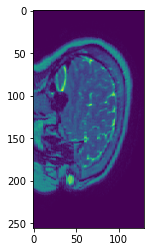

In [29]:
T2_image = img_T2.get_fdata()
# test_mask = 
fig, ax = plt.subplots()
ax.imshow(T2_image[80]//2)

### Load an MRA image

In [30]:
img_MRA = nib.load(bd_image_files_MRA[17])
img_MRA

In [31]:
img_MRA.get_fdata().shape

(512, 512, 100)

### Load a PD IMAGE

In [32]:
img_PD = nib.load(bd_image_files_PD[17])
img_PD

In [34]:
img_PD.get_fdata().shape

(256, 256, 130)

## Create Images for EDA/ understanding Data

#### Create T1 image

MovieWriter ffmpeg unavailable; using Pillow instead.


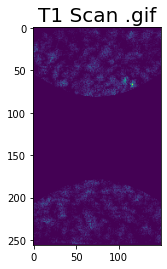

In [35]:
create_gif(img_T1, title="T1 Scan .gif", filename="T1_MRI.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


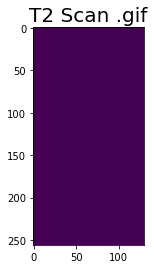

In [36]:
create_gif(img_T2, title='T2 Scan .gif', filename='T2_MRI.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


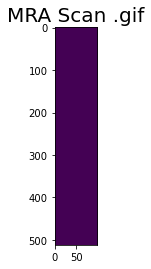

In [32]:
create_gif(img_MRA, title='MRA Scan .gif', filename='MRA_MRI.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


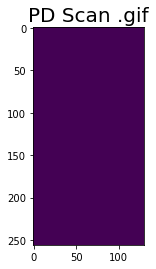

In [36]:
create_gif(img_PD, title='PD Scan .gif', filename='PD_MRI.gif')